# 1. 데이터프레임 연습
- 데이터프레임 생성
- 행/열 삭제
- na 처리
- apply, replace
- library 설치, 불러오기
- join, concat

In [ ]:
# diabetes.csv 를 읽으셔서 df라는 데이터프레임
# 컬럼 정보
# na 체크, 있으면 삭제
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.dropna(inplace=True)

#BMI Outcome 선택해서 df2
df2 = df[["BMI", "Outcome"]]
#df2에서 Outcome의 각 값의 빈도 체크
df2.Outcome.value_counts()

#Insulin하고 Glucose 선택하셔서 df3을 만드세요
df3 = df[ ["Insulin", "Glucose"]]
#df2와 df3을 결합해보세요: concat join
pd.concat( [ df2, df3 ], axis=1   )
df2.join(df3)

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.array([['OK', 'Perfect', 'Acceptable'], ['Awful','Awful', 'Perfect'], ['Acceptable', 'OK', 'Poor']]), columns=['Student1', 'Student2', 'Student3'])
df.replace(['Awful', 'Poor', 'OK', 'Acceptable', 'Perfect'], [0, 1, 2, 3, 4])


,Student1,Student2,Student3
0,2,4,3
1,0,0,4
2,3,2,1


In [ ]:
#정규표현식으로 문자열 제거
df = pd.DataFrame(data=np.array([['1\n', 2, '3\n'], [4, 5, '6\n'], [7, '8\n', 9]]))
df.replace({'\n': '<br>'}, regex=True)

,0,1,2
0,1<br>,2,3<br>
1,4,5,6<br>
2,7,8<br>,9


In [ ]:
#값 변경
df = pd.DataFrame(data=np.array([[1, 2, '+3b'], [4, 5, '-6b'], [7, 8, '+9A']]), columns=['class', 'test', 'result'])
df['result'] = df['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))


In [ ]:
#함수 적용
import numpy as np
def doubler(x):
    if x % 2 == 0:
        return x
    else:
        return x * 2

df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
df.A.apply( doubler )
#df['A'].apply(doubler)	# doubler라는 함수를 A열에 적용

In [ ]:
doubled_df = df.applymap(doubler)	# `applymap()`는 데이터프레임 전체에 행/열 단위 적용시
print(doubled_df)

- 그 외 유용한 함수: rename, resample, pct_change, diff

In [16]:
import yfinance as yf

In [17]:
risky_asset = '035420.KS' #naver
market_benchmark = '^KS11'  #KOSPI
start_date = '2022-01-01'
end_date = '2024-06-30'

In [18]:
df = yf.download( [risky_asset, market_benchmark],
                 start=start_date,
                  end = end_date,
                  progress=False)

In [ ]:
df['Adj Close'].head(1)

In [ ]:
X = df['Adj Close'].rename(columns={risky_asset: 'asset', market_benchmark: 'market'})
X.resample('M').last()
X.pct_change().dropna() #

- pivot

In [ ]:
#피벗
#values: 피벗테이블 정리를 원하는 값
#columns: 피벗의 열
#index: 피벗의 행

products = pd.DataFrame({'category': ['Cleaning', 'Cleaning', 'Entertainment', 'Entertainment', 'Tech', 'Tech'],'store': ['Walmart', 'Dia', 'Walmart', 'Fnac', 'Dia','Walmart'],'price':[11.42, 23.50, 19.99, 15.95, 55.75, 111.55],'testscore': [4, 3, 5, 7, 5, 8]})
products


In [ ]:
pivot_products = products.pivot(index='category', columns='store', values='price')
pivot_products.fillna(0)

In [ ]:
pivot_products2 = products.pivot_table(index='category', columns='store', values='price', aggfunc='mean')
print(pivot_products2)

store            Dia   Fnac  Walmart
category                            
Cleaning       23.50    NaN    11.42
Entertainment    NaN  15.95    19.99
Tech           55.75    NaN   111.55


In [ ]:
#Melting
people = pd.DataFrame({'FirstName' : ['John', 'Jane'],'LastName' : ['Doe', 'Austen'],'BloodType' : ['A-', 'B+'],'Weight' : [90, 64]})
print(pd.melt(people, id_vars=['FirstName', 'LastName'], var_name='measurements'))

  FirstName LastName measurements value
0      John      Doe    BloodType    A-
1      Jane   Austen    BloodType    B+
2      John      Doe       Weight    90
3      Jane   Austen       Weight    64


- 연산

In [ ]:
df2 = pd.DataFrame( np.array( [[1,2], [3,4], [5,6]] ))
df1 = pd.DataFrame( [[1,2], [3,4], [5,6]],
                   index=['a', 'b', 'c'],
                   columns= ['c1','c2']  )

df1.index = ['2022-04-28','2022-04-29', '2022-04-30']
df2.index = ['2022-04-26','2022-04-27', '2022-04-28']

df1.columns = ['c1', 'c2']
df2.columns = ['c2', 'c3']

print(df1+df2)

            c1   c2  c3
2022-04-26 NaN  NaN NaN
2022-04-27 NaN  NaN NaN
2022-04-28 NaN  7.0 NaN
2022-04-29 NaN  NaN NaN
2022-04-30 NaN  NaN NaN


- 파일쓰기 및 읽기

In [ ]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])

df.to_csv('test.csv', sep='\t', encoding='utf-8')
df.to_excel("test.xlsx")    #read_excel

#한글 MS-office 파일 중 CP949인코딩
df2 = pd.read_csv("train_df.csv", encoding="CP949")
df2.head()

- groupby, nth, between

In [41]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")

In [ ]:
diamonds.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [ ]:
diamonds.groupby("cut").nth(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
20,0.30,Good,I,SI2,63.3,56.0,351,4.26,4.30,2.71
21,0.23,Very Good,E,VS2,63.8,55.0,352,3.85,3.92,2.48
26,0.24,Premium,I,VS1,62.5,57.0,355,3.97,3.94,2.47
40,0.33,Ideal,I,SI2,61.2,56.0,403,4.49,4.50,2.75
128,0.91,Fair,H,SI2,64.4,57.0,2763,6.11,6.09,3.93


In [ ]:
tips.groupby("day").nth(2)

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
21,20.29,2.75,Female,No,Sat,Dinner,2
79,17.29,2.71,Male,No,Thur,Lunch,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [ ]:
diamonds[ diamonds.price.between(3500, 3700)   ]
# carat 0.8 ~ 1.0 사이의 행들을 출력
diamonds[ diamonds.carat.between(0.8, 1.0) ]


In [ ]:
idx = diamonds["price"].between(3500, 3700)#3500이상, 3700이하
diamonds[ idx ]

In [ ]:
diamonds[diamonds["price"].between(3500, 3700, inclusive="neither")].sample(5)
#3500 초과, 3700 미만

,carat,cut,color,clarity,depth,table,price,x,y,z
3965,0.90,Premium,F,SI2,61.5,61.0,3507,6.10,6.06,3.74
4457,1.01,Good,G,SI2,63.8,56.0,3620,6.32,6.22,4.00
4775,1.03,Ideal,G,SI2,60.4,56.0,3692,6.56,6.53,3.95
4275,1.00,Premium,G,SI2,60.2,58.0,3584,6.55,6.48,3.92
3948,0.90,Very Good,I,SI2,61.5,57.0,3503,6.16,6.19,3.80


- 열별 통계량

In [ ]:
tips2 = tips[["total_bill", "tip"]]
tips2.tip.median()
tips2.mean()
tips.describe().T
#평균, 중앙값, .....
#데이터프레임.컬럼.함수()
#diamonds에서 carat, price, depth 컬럼을 선택하셔서 describe
diamonds[["carat", "price", "depth"]].describe().T

In [ ]:
tips.total_bill.median() #중앙값
tips.total_bill.max()

50.81

- 행열 전환

In [57]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
Pregnancies,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
diabetes.describe().T.drop("count", axis=1).style.highlight_max(color="darkred")

In [ ]:
diabetes.describe().T.drop("count",axis=1).style.background_gradient( subset=["mean", "50%"], cmap="Reds")

- nlargest, nsmallest, idxmax, idxmin

In [ ]:
diamonds.nlargest(5, "price")

#tips에서 tip의 값이 상위3개에 해당하는 행을 출력
tips.nlargest(3, "tip")

In [ ]:
diamonds.nsmallest(5, "price")

In [59]:
diamonds.price.idxmax() #price 컬럼의 최대값이 있는 행번호..
diamonds.carat.idxmin() # carat 컬럼의 최소값이 있는...

14

#2. SQL + 데이터프레임

- query함수

In [61]:
data = {"age": [10, 10, 21, 22], "weight": [20, 30, 60, 70]}
df = pd.DataFrame(data)
df.head(1)

,age,weight
0,10,20


In [63]:
1 == 1
1 != 1

False

In [ ]:
df.query("age == 10") # 특정 값과 같은

In [ ]:
df.query("age != 10" )  # 같지 않은

In [ ]:
df.query("age >= 22")

In [ ]:
#diamonds에서 price가 평균보다 큰 행들을 출력하세요
a = diamonds.price.mean()
diamonds.query("price > @diamonds.price.mean()")
diamonds.query("price > @a").query("carat > 0.9")

#and &, or |
True & True
#diamonds[ (diamonds.carat > 0.9 ) & (diamonds.price > 3732)  ]
diamonds.query(" (carat>0.9) & (price>3732)   ")
#carat이 평균보다 작고(그리고), price가 중앙값(median)보다 작은 행 출력
diamonds.query(" (carat<@diamonds.carat.mean()) & (price<@diamonds.price.median())")
diamonds.query(" (carat<0.5) | (price>4000)")
#  (( A & B )| C ) & D

#creditset2.csv -> credit로 읽으세요
# loan이 평균보다 작거나 또는 income이 평균보다 작은 사람들 중에서,
# age가 50보다 큰 행 출력
credit = pd.read_csv("creditset2.csv")
credit.query(
    "(loan < @credit.loan.mean() | income < @credit.income.mean()) & (age > 50)")


In [ ]:
df.query("age in [21, 22]")     # "age == [21, 22]"

,age,weight
2,21,60
3,22,70


In [ ]:
df.query("age not in [21, 22]")        #  "age != [21, 22]"

,age,weight
0,10,20
1,10,30


In [ ]:
df.query("(age == 10) and (weight >= 30)")                   # and 연산

,age,weight
1,10,30


In [ ]:
num_age    = 10
num_weight = 30
df.query("(age == @num_age) and (weight >= @num_weight)")       # @: 외부 변수값 사용

,age,weight
1,10,30


In [ ]:
def my_max(x, y):
    return max(x,y)

df.query("age >= @my_max(1,22)") # @ 외부 함수 사용

,age,weight
3,22,70


In [ ]:
df.query("index >= 2" )  # index 활용

,age,weight
2,21,60
3,22,70


In [ ]:
data = {"name": ["White tiger", "Tiger black", "Red tiger"], "age": [5, 7, 9]}
df = pd.DataFrame(data)

In [ ]:
df.query("name.str.contains('tiger')")               # 문자열 포함

,name,age
0,White tiger,5
2,Red tiger,9


In [ ]:
df.query("name.str.startswith('Tiger')")                 # 문자열 시작

,name,age
1,Tiger black,7


- Union

In [82]:
df1 = pd.DataFrame({"age": [10, 10, 21, 22], "weight": [20, 30, 60, 70]}, index=[0,1,2,3])
df2 = pd.DataFrame({"age": [10, 10, 21, 22], "weight": [20, 30, 60, 70]}, index=['a','b','c','d'])

In [86]:
pd.concat([df1, df2], ignore_index=True).drop_duplicates()    #행으로 결합

,age,weight
0,10,20
1,10,30
2,21,60
3,22,70


In [ ]:
df1 = pd.DataFrame({"age": [10, 10, 21, 22], "weight": [20, 30, 60, 70]}, index=[0,1,2,3])
df2 = pd.DataFrame({"score": [30, 30, 41, 42], "weight": [20, 30, 60, 70]}, index=['a','b','c','d'])

In [ ]:
pd.concat([df1, df2], ignore_index=True).drop_duplicates()    #행으로 결합

,age,weight,score
0,10.0,20,NaN
1,10.0,30,NaN
2,21.0,60,NaN
3,22.0,70,NaN
4,NaN,20,30.0
5,NaN,30,30.0
6,NaN,60,41.0
7,NaN,70,42.0


In [88]:
pd.concat([df1, df2], ignore_index=True, axis=1).drop_duplicates()    #열 결합
pd.concat([df1, df2], ignore_index=True, axis=1, join="inner").drop_duplicates()    #열 결합

,0,1,2,3


- pandasql

In [ ]:
!pip install pandasql

In [ ]:
from pandasql import sqldf
penguins = sns.load_dataset('penguins')
print(penguins.head())


In [103]:
#BostonHousing.csv를 boston 으로 읽으세요
boston = pd.read_csv("BostonHousing.csv")
boston.head()
#1. age < 40, crim < 0.03, medv이 평균 보다 작은 행을 출력
sqldf( '''
select * from boston
where age < 40 and crim < 0.03 and medv < (select avg(medv) from boston)
''')
#2. crim 이 0.02보다 작을때, rad값의 distinct를 적용한 값 출력
sqldf('''
select distinct rad from boston where crim < 0.02
''')

,rad
0,1
1,3
2,5
3,4


In [100]:
boston.medv.mean()

22.532806324110677

In [ ]:
sqldf("SELECT species, island FROM penguins LIMIT 5 ")

In [98]:
sqldf('''

SELECT DISTINCT species
                 FROM penguins

                 ''')

,species
0,Adelie
1,Chinstrap
2,Gentoo


In [ ]:
sqldf('''SELECT body_mass_g
                 FROM penguins
                ORDER BY body_mass_g DESC
                LIMIT 5''')

,body_mass_g
0,6300.0
1,6050.0
2,6000.0
3,6000.0
4,5950.0


In [ ]:
sqldf('''SELECT DISTINCT species
                 FROM penguins
                WHERE sex = 'Male'
                  AND flipper_length_mm > 210''')

,species
0,Chinstrap
1,Gentoo


In [ ]:
sqldf('''SELECT species, MAX(bill_length_mm)
                 FROM penguins
                GROUP BY species''')

,species,MAX(bill_length_mm)
0,Adelie,46.0
1,Chinstrap,58.0
2,Gentoo,59.6


In [ ]:
print(penguins[['species', 'bill_length_mm']].groupby('species', as_index=False).max())

     species  bill_length_mm
0     Adelie            46.0
1  Chinstrap            58.0
2     Gentoo            59.6


In [ ]:
sqldf('''SELECT bill_length_mm / bill_depth_mm AS length_to_depth
                 FROM penguins
                ORDER BY length_to_depth DESC
                LIMIT 5''')

,length_to_depth
0,3.612676
1,3.510490
2,3.505882
3,3.492424
4,3.458599


- with, union

In [105]:
sqldf('''
with temp1 as (SELECT species, MAX(bill_length_mm) as b
                 FROM penguins
                GROUP BY species)

''')

PandaSQLException: (sqlite3.OperationalError) incomplete input
[SQL: 
with temp1 as (SELECT species, MAX(bill_length_mm) as b
                 FROM penguins
                GROUP BY species)

]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
sqldf('''
with temp1 as (
  SELECT species, MAX(bill_length_mm) as b
                 FROM penguins
                GROUP BY species
)
select * from temp1 where b>50
''')

,species,b
0,Chinstrap,58.0
1,Gentoo,59.6


In [ ]:
sqldf('''

select * from penguins where species == 'Adeli'
union all
select * from penguins where species == 'Chinstrap'
union all
select * from penguins where species == 'Gentoo'

''')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
1,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
2,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
3,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
4,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
...,...,...,...,...,...,...,...
187,Gentoo,Biscoe,NaN,NaN,NaN,NaN,None
188,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
189,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
190,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 3. Exploratory Data Analysis

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
boston = pd.read_csv("BostonHousing.csv")
boston.columns
boston.info()

In [ ]:
boston.hist(bins=30, figsize=(12,12), density=True) #분포, distribution
#plt.show()
plt.savefig("boston.jpg")

In [ ]:
#sns를 활용한 Box plot
boston = pd.read_csv("BostonHousing.csv")[['rm', 'lstat', 'crim']]

sns.boxplot(y=boston['rm'])
plt.title('Boxplot')

<Axes: >

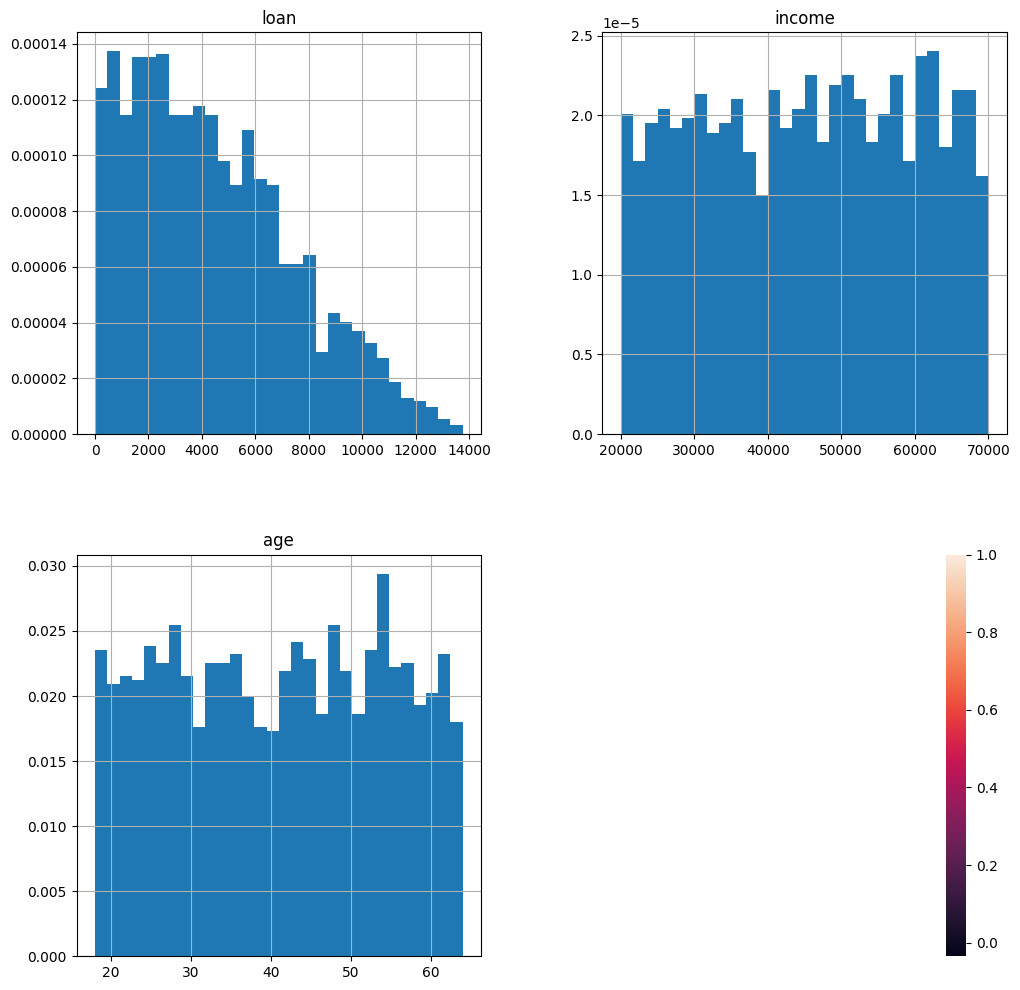

In [113]:
#creditset2.csv  -> credit
#1. credit loan, income, age 컬럼에 대해서 hist, 그림파일로도 저장

credit = pd.read_csv("creditset2.csv")
credit2 = credit[['loan', 'income', 'age']]
credit2.hist(bins=30, figsize=(12,12), density=True)
plt.savefig("histogram.jpg")

#2. loan에 대해서 boxplot, 그림파일로도 저장
sns.boxplot(y=credit.loan)
plt.savefig("boxplot.jpg")


In [ ]:
#outlier 제거하기
#boxplot의 IQR(Q3-Q1)의 1.5배를 넘는 값들을 제거
def find_boundaries(df, variable, distance):
	IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
	lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
	upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
	return upper_boundary, lower_boundary

upper_boundary, lower_boundary = find_boundaries(boston, 'rm', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

- np.where 활용

In [ ]:
a=np.array( [ 2,3,4,5])
print( a > 3 )
np.where( a>3, "A" ,  "B" )
~(a>3)

[False False  True  True]


array([ True,  True, False, False])

In [ ]:
outliers = np.where(boston['rm'] > upper_boundary, True,
                    np.where(boston['rm'] < lower_boundary, True, False)
                    )
~outliers
boston['rm'][~outliers]  #outlier만 출력, T,F로 해당 위치의 값을 선택...

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 476, dtype: float64

In [ ]:
outliers_df = boston.loc[outliers, 'rm']  #iloc는 정수값...
outliers_df.head()

#outlier 실제로 제거해보기
boston.loc[~outliers, 'rm']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 476, dtype: float64

In [ ]:
#crim 변수에서 중앙값보다 크거나, q1보다 작은 값들만 선택하세요
#np.where를 이용하세요
q1 = boston.crim.quantile(0.25)  #Q1
q2 = boston.crim.quantile(0.5)  #Q2, 중앙값
abc = np.where( boston.crim > q2  , True   ,
         np.where( boston.crim < q1, True, False )
         )

boston.crim[abc]
boston.loc[ abc, "crim"]


0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
497    0.26838
501    0.06263
502    0.04527
503    0.06076
505    0.04741
Name: crim, Length: 380, dtype: float64

- 시각화로 탐색

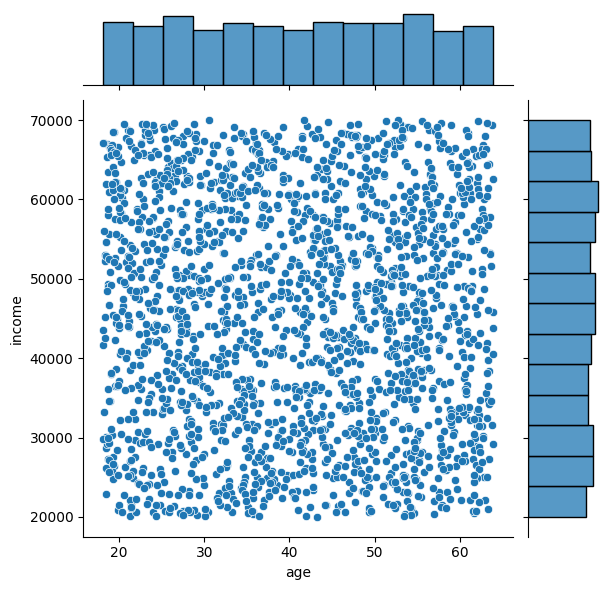

In [ ]:
data = pd.read_csv("creditset2.csv")
join1 = sns.jointplot(x="age", y="income", data=data);
join1.savefig("join1.png")

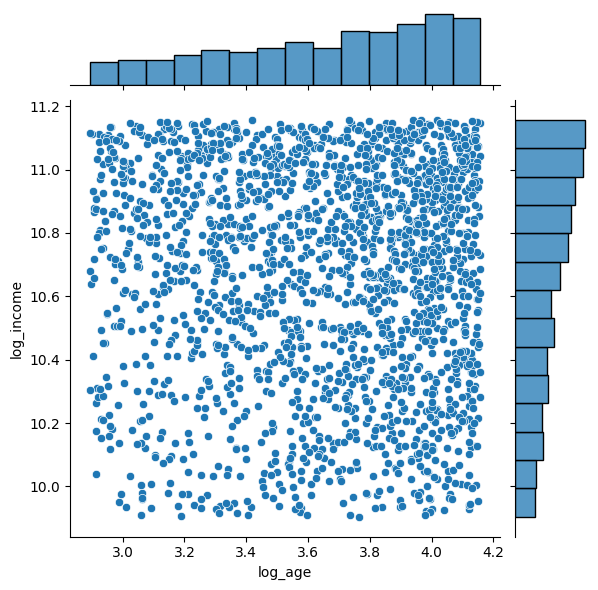

In [ ]:
data["log_age"] = np.log( data.age )
data["log_income"] =np.log( data.income)

join1 = sns.jointplot(x="log_age", y="log_income", data=data);
join1.savefig("join1_log.jpg")

In [ ]:
#tips 예제 데이터로 연습
tips = sns.load_dataset('tips')
sns.set_style("whitegrid")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

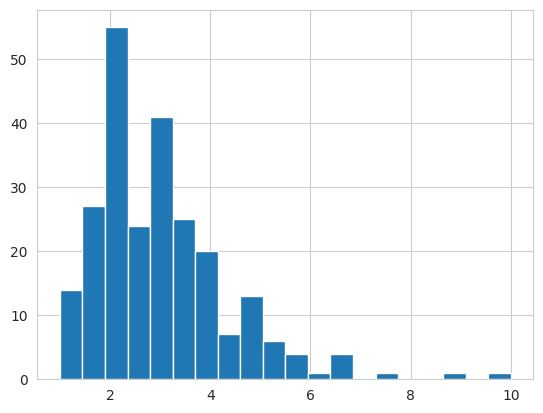

In [ ]:
#tips 자료에서 total_bill, tip 사이의 corr를 구하고, p-value 확인
from scipy import stats
stats.pearsonr( tips.total_bill, tips.tip)
#요일별 빈도 체크
tips.day.value_counts()
#tip에 대한 histogram
tips.tip.hist( bins = 20 )

- tips 데이터에서, time별로 total_bill의 박스플랏
- 각 boxplot은 성별로 나눠서 표현 (hue를 지정)

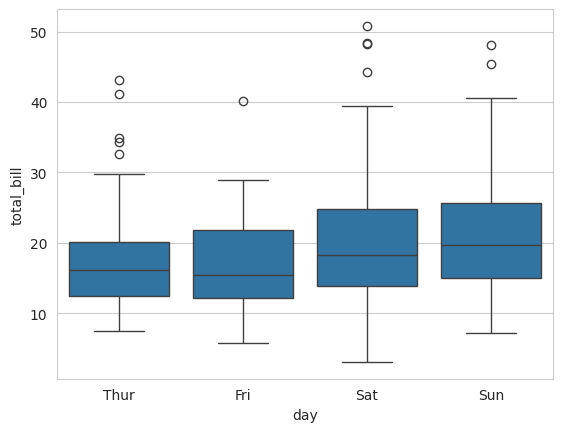

In [ ]:
#box plot
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

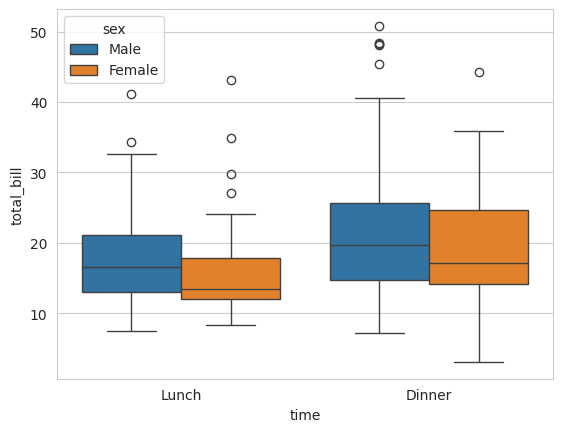

In [ ]:
#box plot
sns.boxplot(x="time", y="total_bill", hue="sex", data=tips)
plt.show()

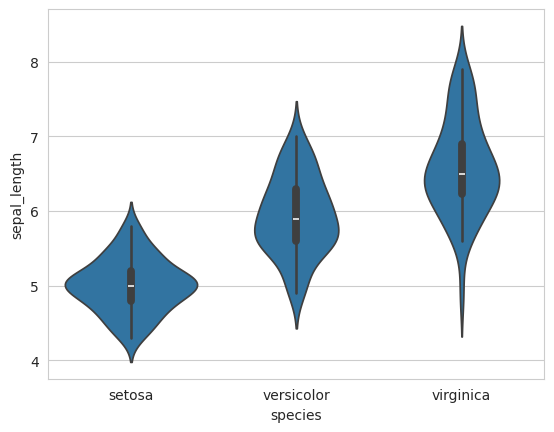

In [ ]:
#violin plot
iris = sns.load_dataset("iris")
sns.violinplot(x=iris.species, y=iris.sepal_length, data=iris);
plt.savefig("violin.png")

In [ ]:
#pivot+Heatmap
#pivot
df1 = pd.DataFrame( {'x':['A','B', 'C', 'D', 'E', 'F'], 'y':[2021,2021,2021,2022,2022,2022], 'z':[1,2,3,4,5,6]})
df1
df1.pivot(index='x',columns='y', values='z').fillna(0) #index 중복 없어야 함.

y,2021,2022
x,,
A,1.0,0.0
B,2.0,0.0
C,3.0,0.0
D,0.0,4.0
E,0.0,5.0
F,0.0,6.0


In [ ]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
df = flights.pivot(index='month', columns='year', values='passengers') #행, 열 지정, 값 지정
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<Axes: xlabel='year', ylabel='month'>

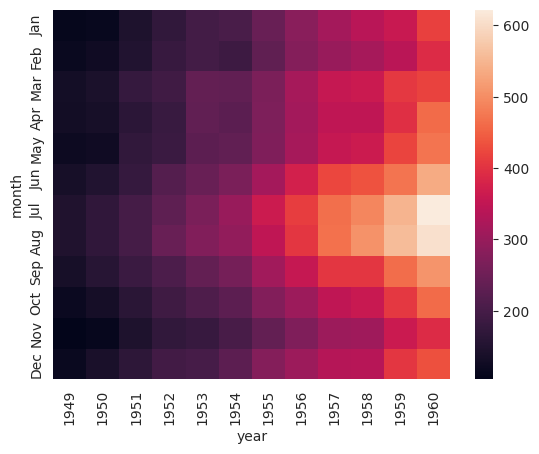

In [ ]:
sns.heatmap(df)

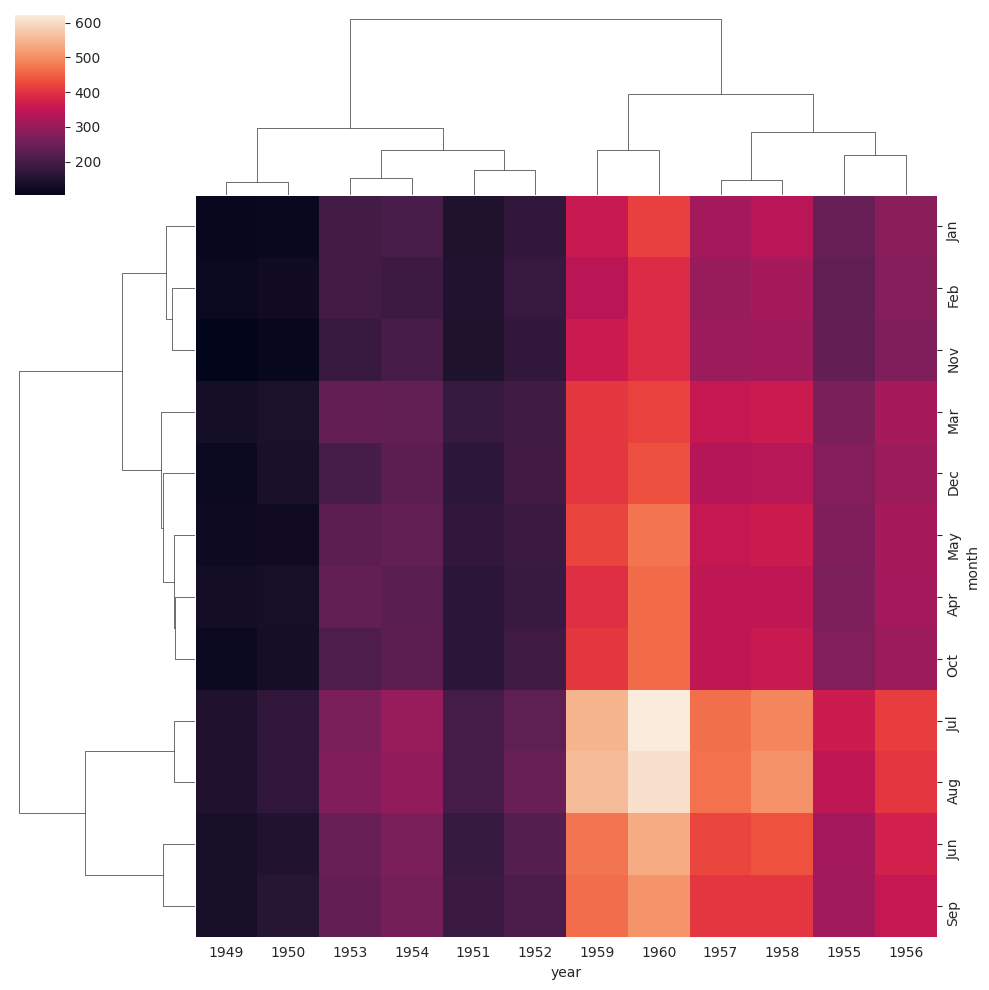

In [ ]:
sns.clustermap(df)

- pairplot

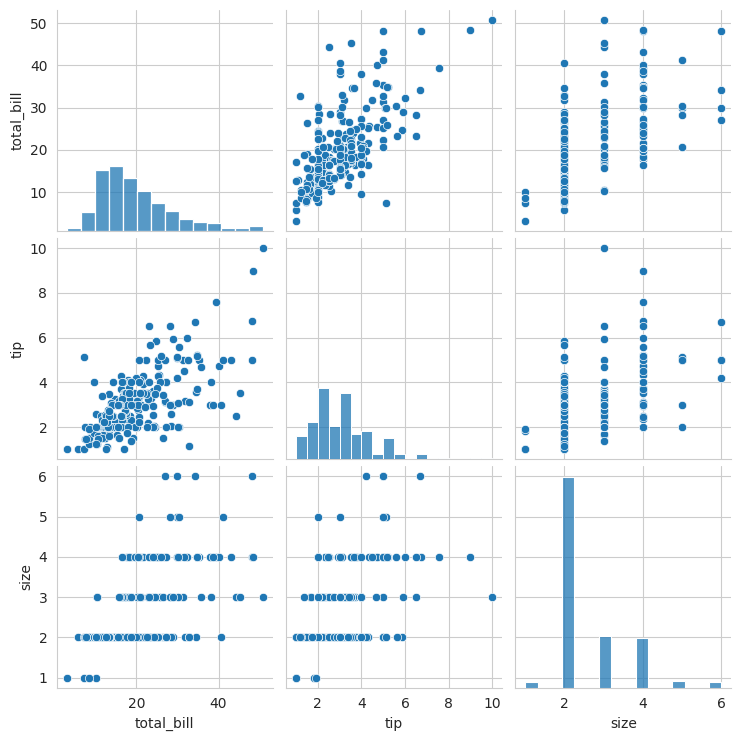

In [ ]:
sns.pairplot(tips)